# What is [Whisper](https://openai.com/index/whisper/)?
Whisper is a state-of-the-art speech-to-text model developed by OpenAI. It is designed to convert spoken language into written text very effectively. Whisper is trained on a diverse set of data, which helps it understand various languages and accents from around the world. This makes it highly versatile and useful for a wide range of applications that involve transcribing speech.

## Why Whisper
- It is trained on 680,000 hours of data from the web
- It is open-sourced that you can fine tune as much you want
- It take input in log-Mel spectrogram of 30 sec of audio
- It take 16hz 1 channel voice signal

# Architecture

![image](https://images.ctfassets.net/kftzwdyauwt9/d9c13138-366f-49d3-a1a563abddc1/8acfb590df46923b021026207ff1a438/asr-summary-of-model-architecture-desktop.svg?w=1920&q=90&fm=webp)
Whisper uses a special system called a Transformer, which includes an encoder and a decoder, to process speech. Here’s how it works in simple terms:

1. **Break Down Audio:** It cuts the audio into 30-second pieces.
2. **Convert Audio:** Each piece is turned into a type of visual representation called a log-Mel spectrogram, which helps the system understand the sound.
3. **Generate Text:** It then writes out what was said in the audio as text.

Besides just writing text from speech, Whisper can also identify what language is being spoken, give timestamps for phrases, transcribe speech in multiple languages, and even translate non-English speech into English.


[research paper](https://cdn.openai.com/papers/whisper.pdf)

# Convert audio to log-Mel spectrogram

In [1]:
# we have download audio
import requests
import torchaudio
import io
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    plt.title(title)
    plt.specgram(waveform[-1],Fs=sample_rate)


In [31]:
url = "https://github.com/microsoft/Cognitive-Custom-Speech-Service/raw/master/Samples/Sample1%20-%20Biology/Test%20Data/Test%20Acoustic%20Data/b001.wav"
with requests.get(url, stream=True) as response:
    file = io.BytesIO(response.raw.read())
    waveform, sample_rate = torchaudio.load(file, normalize=True)

In [18]:
from IPython.display import Audio
from IPython.core.display import display

In [22]:
print("AUDIO")
display(Audio(waveform, rate=sample_rate))

AUDIO


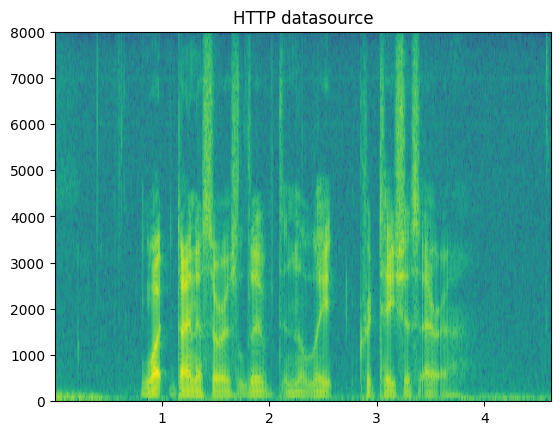

In [5]:
plot_specgram(waveform, sample_rate, title="HTTP datasource")

In [6]:
print("AUDIO FEATURES")
print(f"sample rate: {sample_rate}")
num_channels, num_frames = waveform.shape
print(f"no of channel: {num_channels}")
print(f"audio duration: {num_frames/sample_rate}")

AUDIO FEATURES
sample rate: 16000
no of channel: 1
audio duration: 4.625


In [7]:
n_fft = 256

n_stft = int((n_fft//2) + 1)
transofrm = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=n_fft)

/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  warnings.warn(


In [8]:
wave = transofrm(waveform)

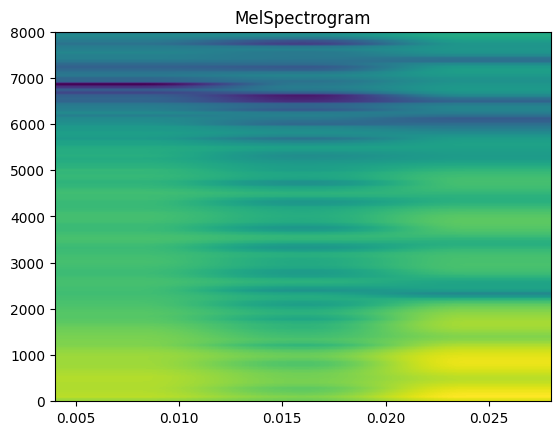

In [9]:
plot_specgram(wave[-1], sample_rate, title="MelSpectrogram")

## Any Questions about Whisper

# Running Whisper in Hugging face

### What is [Hugging Face](https://huggingface.co/)?
Hugging Face is known for their "Transformers" library, which makes it easy and efficient to train and use AI models, particularly for tasks involving understanding and generating text. This library simplifies working with these powerful models, helping developers and researchers achieve better results faster.

[openai/whisper-tiny](https://huggingface.co/openai/whisper-tiny)





In [10]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

In [11]:
processor = WhisperProcessor.from_pretrained("openai/whisper-tiny")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny")
model.config.forced_decoder_ids = None

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [12]:
resample = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)

In [13]:
audio = resample(waveform[-1])

In [14]:
input_features = processor(audio, sampling_rate=16000, return_tensors="pt").input_features

In [15]:
predicted_ids = model.generate(input_features)

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


In [16]:
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=False)

In [17]:
transcription

['<|startoftranscript|><|en|><|transcribe|><|notimestamps|> What dinosaurs lived in the late Cretaceous era?<|endoftext|>']

# Why transfomers libary not that good ?
- although transformers libary is optimized from ML frame works but not that well we have KV cache problem
- it don't have optimized self attention mechanism

#### So we have CTranslate2  ,VLLM etc which make infrence easy and effecient and at most production system we use this kind of stuff rather than use basic ML framework

we gonna focus about [CTranslate2](https://github.com/OpenNMT/CTranslate2/) and [faster-whisper](https://github.com/SYSTRAN/faster-whisper)


###### install faster-whisper

In [23]:
!pip install faster-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


###### ct2-transformers-converter --model <any whisper model from hugging face> --copy_files preprocessor_config.json --output_dir <output dir> --quantization float16
by using this command use can use any hugging face whisper model you can get diffrent india native language model at [vasista22](https://huggingface.co/vasista22) you can play around

In [25]:
!ct2-transformers-converter --model openai/whisper-tiny --copy_files preprocessor_config.json --output_dir whisper-tiny --quantization float16

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [26]:
from faster_whisper import WhisperModel

In [28]:
model = WhisperModel("whisper-tiny")

In [34]:
segments, info = model.transcribe(audio.detach().numpy(), beam_size=5)

In [35]:
for segment in segments:
    print("[%.2fs -> %.2fs] %s" % (segment.start, segment.end, segment.text))

[0.00s -> 4.00s]  What dinosaurs lived in the late Cretaceous era?


## Local setup with WhisperLive Custom which is fork of whisper-live which is stream line [WhisperCustom](https://github.com/anshjoseph/WhisperCustom/tree/master)

### Intruction to setup
- git clone https://github.com/anshjoseph/WhisperCustom/tree/master
- pip install -r req.txt [NOTE: intallation is quite big and you have install build tools before hand]
- python3 run_server.py
- python3 client.py (its use your mic for live transcription)